## Step 1: Reading and Understanding the Data

In [199]:
    # Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Required Libraries

import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)
pd.set_option('max_info_columns', 500)
pd.set_option('max_info_rows', 500)

In [200]:
country = pd.read_csv("Country-data.csv")

In [201]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [202]:
# Converting the Percentages columns into real values

country['exports'] = country['exports']*country['gdpp']/100 
country['health'] = country['health']*country['gdpp']/100
country['imports'] = country['imports']*country['gdpp']/100

In [203]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [204]:
country.shape

(167, 10)

In [205]:
# There are no missing values
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [206]:
country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [207]:
# Dropping Dulicates
country = country.drop_duplicates()

In [208]:
country.shape 
# Confirmed that there are no duplicates

(167, 10)

In [209]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [210]:
# Copying the country data set

country1 = country.copy()

## Step 2: Performing PCA

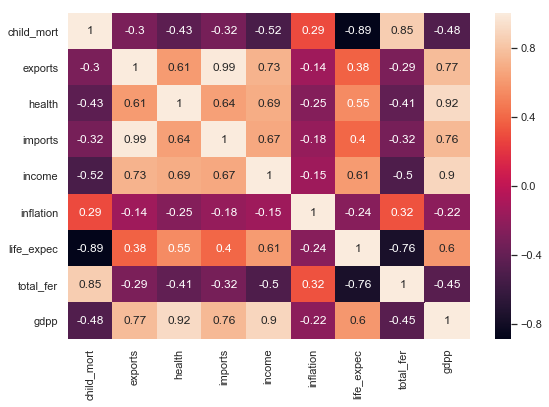

In [211]:
# Checking the correlations to perform PCA
fig = plt.figure(figsize=[9,6])
sns.heatmap(country.corr(),annot=True)
plt.show()

# There are many correlated variables hence PCA can be performed for Dimensionality Reduction

In [212]:
y = country1.pop("country")

In [213]:
# Importing the scikit library 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [214]:
x = country1.copy()

In [215]:
x = scaler.fit_transform(x)

#### Applying PCA on the data

In [216]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)

In [217]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [218]:
pca.components_ # new basis vectors

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [219]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

In [220]:
# Cummulative Variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

var_cumu

array([0.58937298, 0.77382467, 0.87293939, 0.93366217, 0.96395389,
       0.98855216, 0.9979496 , 0.99950602, 1.        ])

#### Making scree plot

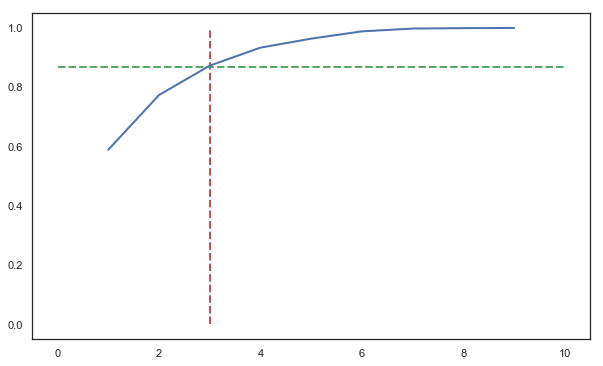

In [221]:
fig = plt.figure(figsize=[10,6])
plt.plot(range(1,len(var_cumu)+1),var_cumu)
plt.vlines(x=3, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.87, xmax=10, xmin=0, colors="g", linestyles="--")
plt.show()

About 90% variance is explaining by 3 components

#### PCA with 3 Components

In [222]:
pc3 = PCA(n_components=3,random_state = 42)

In [223]:
newdata = pc3.fit_transform(x)

In [224]:
newdata.shape

(167, 3)

In [225]:
# Making a dataframe

df = pd.DataFrame(newdata, columns = ["PC1","PC2","PC3"])

df.head()

,PC1,PC2,PC3
0,-2.635575,1.472267,-0.549489
1,-0.024206,-1.429892,-0.014123
2,-0.459557,-0.675495,0.959355
3,-2.722630,2.172332,0.600215
4,0.648597,-1.023437,-0.257430


In [226]:
country_final = pd.concat([df,y],axis=1)

In [227]:
country_final.head()

,PC1,PC2,PC3,country
0,-2.635575,1.472267,-0.549489,Afghanistan
1,-0.024206,-1.429892,-0.014123,Albania
2,-0.459557,-0.675495,0.959355,Algeria
3,-2.722630,2.172332,0.600215,Angola
4,0.648597,-1.023437,-0.257430,Antigua and Barbuda


In [228]:
country_final.describe()

,PC1,PC2,PC3
count,1.670000e+02,1.670000e+02,1.670000e+02
mean,-5.318434e-17,-5.318434e-17,2.958379e-17
std,2.310046e+00,1.292310e+00,9.473152e-01
min,-3.937287e+00,-1.694220e+00,-1.756335e+00
25%,-1.447294e+00,-9.750541e-01,-4.010482e-01
50%,-3.574241e-01,-4.017902e-01,-1.744060e-01
75%,8.494139e-01,6.800428e-01,2.557727e-01
max,1.264807e+01,8.276683e+00,7.928939e+00


## Step 3: Visualizing the Outliers

In [229]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
country_final.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,PC1,PC2,PC3
count,1.670000e+02,1.670000e+02,1.670000e+02
mean,-5.318434e-17,-5.318434e-17,2.958379e-17
std,2.310046e+00,1.292310e+00,9.473152e-01
min,-3.937287e+00,-1.694220e+00,-1.756335e+00
25%,-1.447294e+00,-9.750541e-01,-4.010482e-01
50%,-3.574241e-01,-4.017902e-01,-1.744060e-01
75%,8.494139e-01,6.800428e-01,2.557727e-01
90%,2.975972e+00,1.589093e+00,9.268108e-01
95%,3.918214e+00,2.171857e+00,1.174732e+00
99%,6.376268e+00,3.303637e+00,3.091800e+00


In [230]:
num_list = ['PC1','PC2','PC3']

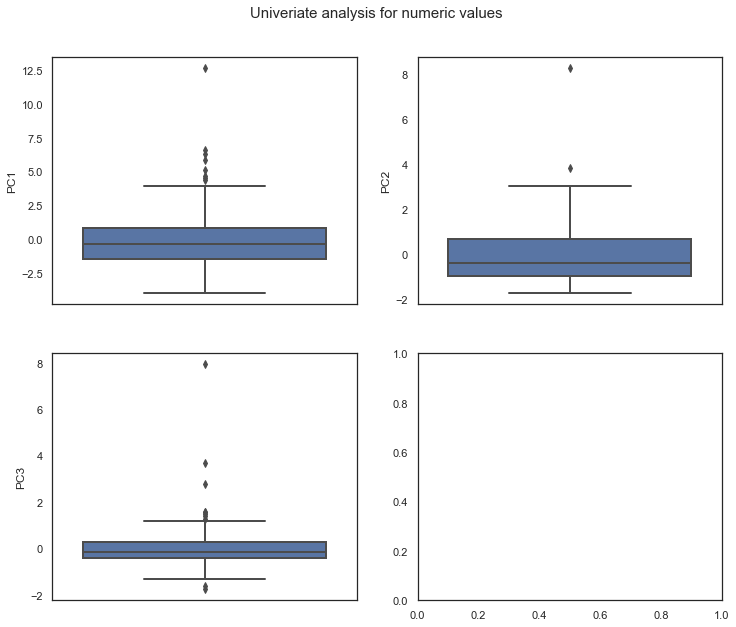

In [231]:
fig, axes = plt.subplots(2,2, figsize= (12,10))
count = 0
for i in country_final[num_list].columns:
    ax = axes[count//2, count%2]
    sns.boxplot(y = i, data = country_final, ax = ax)
    count+=1
fig.suptitle('Univeriate analysis for numeric values',fontsize=15,x =0.5, y=0.95)
fig.subplots_adjust(wspace=0.2,hspace=0.2 ) # adjsut spaces between subplots width and height
plt.show()

### `Applying Incremental PCA`

In [232]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)

In [233]:
df_train_pca = pca_final.fit_transform(x)
df_train_pca.shape

(167, 3)

In [234]:
pc = np.transpose(df_train_pca)

In [235]:
country_names = list(country['country'])

In [236]:
df_pca_final = pd.DataFrame({'country':country_names,'PC1':pc[0],'PC2':pc[1],'PC3':pc[2]})

In [237]:
df_pca_final.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Albania,-0.022277,-1.431896,-0.020701
2,Algeria,-0.457626,-0.673301,0.961867
3,Angola,-2.724520,2.174583,0.606687
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103


In [238]:
df_pca_final.describe()

,PC1,PC2,PC3
count,1.670000e+02,1.670000e+02,1.670000e+02
mean,2.127373e-17,1.329608e-18,2.925139e-17
std,2.310042e+00,1.292295e+00,9.467202e-01
min,-3.944960e+00,-1.696969e+00,-1.791111e+00
25%,-1.446673e+00,-9.783466e-01,-3.974440e-01
50%,-3.567044e-01,-3.984503e-01,-1.740323e-01
75%,8.505467e-01,6.782430e-01,2.604698e-01
max,1.264435e+01,8.265266e+00,7.866491e+00


## Step 4: Removing outliers

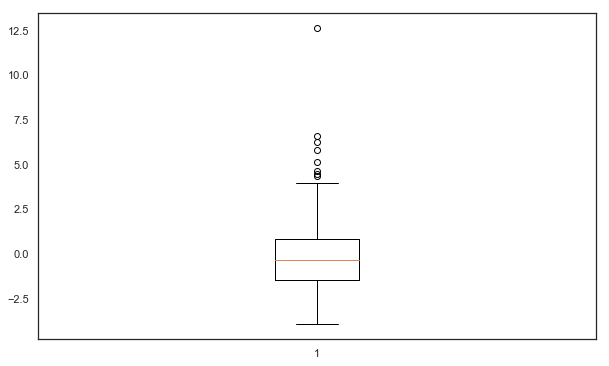

In [239]:
fig = plt.figure(figsize=[10,6])
plt.boxplot(df_pca_final.PC1)
plt.show()

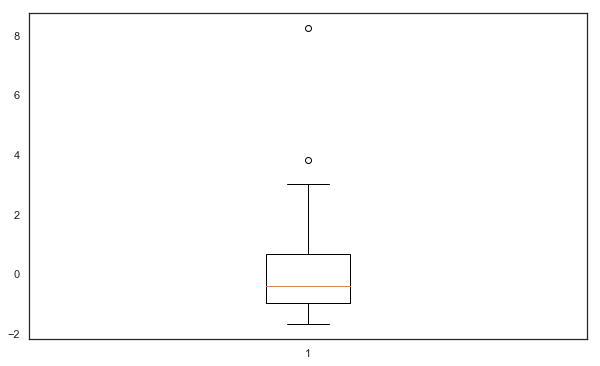

In [240]:
fig = plt.figure(figsize=[10,6])
plt.boxplot(df_pca_final.PC2)
plt.show()

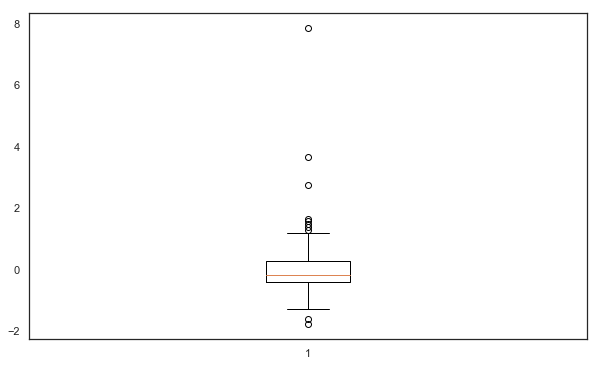

In [241]:
fig = plt.figure(figsize=[10,6])
plt.boxplot(df_pca_final.PC3)
plt.show()

In [242]:
# Removing Statistical Outliers

# Outlier treatment for  PC1

Q1 = df_pca_final.PC1.quantile(0.05)
Q3 = df_pca_final.PC1.quantile(0.95)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PC1 >= Q1) & (df_pca_final.PC1 <= Q3)]

# Outlier treatment for  PC2

Q1 = df_pca_final.PC2.quantile(0.05)
Q3 = df_pca_final.PC2.quantile(0.95)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PC2 >= Q1) & (df_pca_final.PC2 <= Q3)]

# Outlier treatment for  PC3

Q1 = df_pca_final.PC3.quantile(0.05)
Q3 = df_pca_final.PC3.quantile(0.95)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PC3 >= Q1) & (df_pca_final.PC3 <= Q3)]


In [243]:
# Removed all the outliers
df_pca_final.shape

(119, 4)

### `Now, we are good to proceed for Clustering Analysis`

## Step 5: Clustering

`Viewing the data spread`

In [244]:
df = df_pca_final.copy()

In [245]:
y = df_pca_final.pop('country')

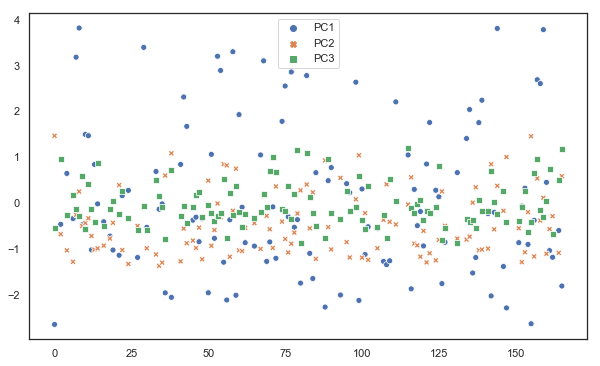

In [246]:
fig = plt.figure(figsize=[10,6])
sns.scatterplot(data=df_pca_final)
plt.show()

Now, we need to understand whether the obtained dataset is relavant for clustering or not. This can be done by 'Hopkins Statistics'

## `Hopkins Statistics`

In [247]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np, pandas as pd
from math import isnan

 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [248]:
hopkins(df_pca_final)

# A range {0.7,......0.99} indicates high tendency for clustering. Hence we are good to proceed further

0.7566934261932011

# K-means Clustering

In [249]:
# Importing Required Libraries

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [250]:
# Standardising the data again

# instantiate
scaler = StandardScaler()

df_clustering = scaler.fit_transform(df_pca_final)

### Finding optimal number of clusters

#### Elbow - Curve/SSD

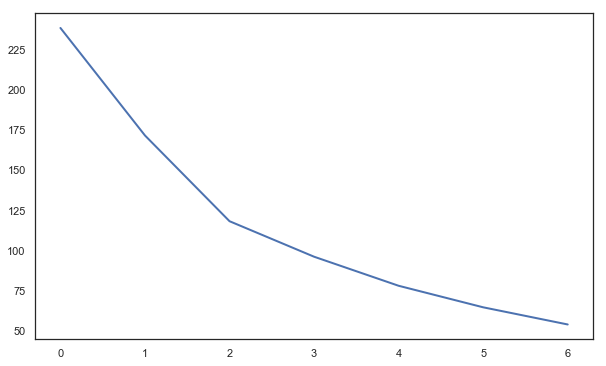

In [251]:
fig = plt.figure(figsize=[10,6])
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_clustering)
    
    ssd.append(kmeans.inertia_)
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)
plt.show()

#### Silhouette Analysis

In [252]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_clustering)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_pca_final, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.3713215260432897
For n_clusters=3, the silhouette score is 0.463793091992054
For n_clusters=4, the silhouette score is 0.35621407867787014
For n_clusters=5, the silhouette score is 0.3077335010905147
For n_clusters=6, the silhouette score is 0.32052791510741846
For n_clusters=7, the silhouette score is 0.2832092952944248
For n_clusters=8, the silhouette score is 0.28385358500202074


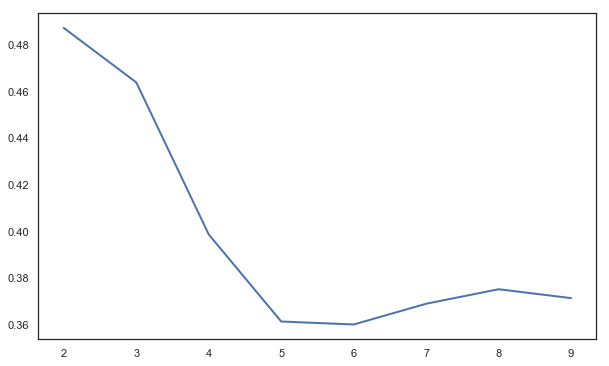

In [253]:
fig = plt.figure(figsize=[10,6])
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(df_pca_final)
    sse_.append([k, silhouette_score(df_pca_final, kmeans.labels_)])

plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

Cross verifying Elbow and Silhouette, it appears k-means with 5 clusters as ideal

In [254]:
df_clustering.shape

(119, 3)

## Modelling

In [255]:
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(df_clustering)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [256]:
kmeans.labels_

array([0, 3, 2, 2, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 2, 0, 2, 2, 2, 1, 2, 3,
       2, 2, 0, 4, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 1, 1, 4, 0, 2, 1, 4, 1,
       2, 2, 2, 2, 1, 2, 3, 3, 4, 1, 1, 2, 1, 2, 3, 0, 3, 2, 0, 2, 0, 3,
       2, 0, 2, 2, 1, 4, 2, 0, 2, 2, 2, 0, 3, 1, 3, 0, 2, 2, 2, 2, 2, 1,
       2, 3, 0, 2, 2, 1, 1, 0, 0, 1, 1, 2, 4, 2, 1, 4, 0, 2, 2, 2, 0, 0,
       3, 3, 1, 1, 2, 3, 0, 3, 4])

In [257]:
# assigning the labels
df['cluster_id'] = kmeans.labels_
df.head()

,country,PC1,PC2,PC3,cluster_id
0,Afghanistan,-2.637442,1.469038,-0.541359,0
2,Algeria,-0.457626,-0.673301,0.961867,3
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103,2
6,Armenia,-0.332692,-1.274517,0.176636,2
7,Australia,3.180362,-0.250785,-0.116877,1


In [258]:
df['cluster_id'].value_counts()

2    51
1    24
0    19
3    17
4     8
Name: cluster_id, dtype: int64

### `Visualizing the clusters on principal components`

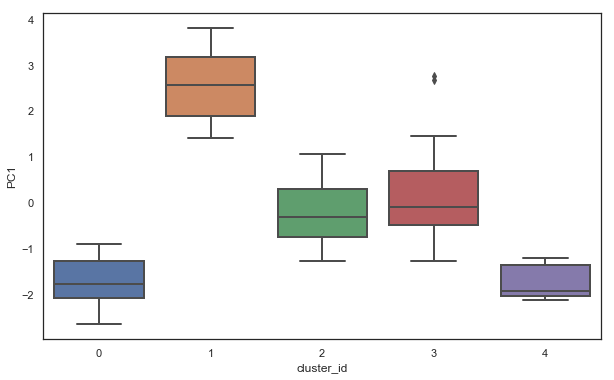

In [259]:
fig = plt.figure(figsize=[10,6])
sns.boxplot(x='cluster_id', y='PC1', data=df)
plt.show()

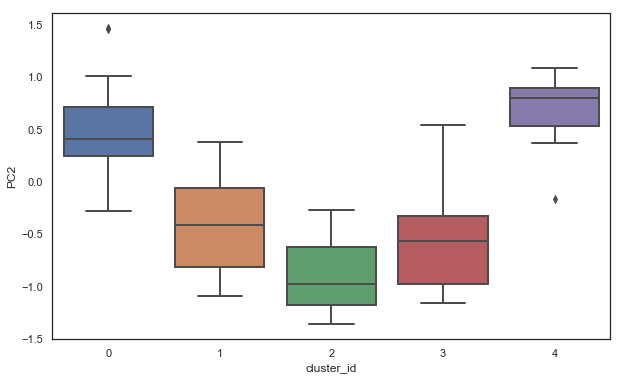

In [260]:
fig = plt.figure(figsize=[10,6])
sns.boxplot(x='cluster_id', y='PC2', data=df)
plt.show()

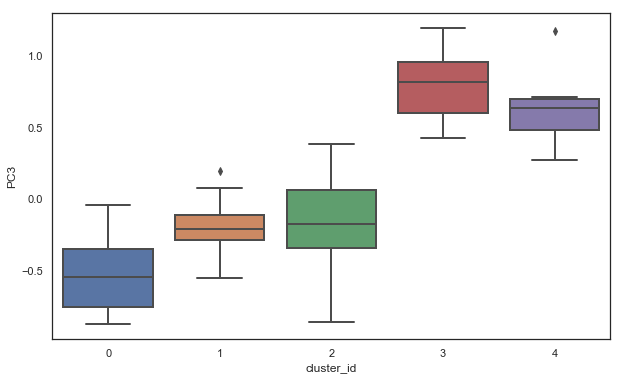

In [261]:
fig = plt.figure(figsize=[10,6])
sns.boxplot(x='cluster_id', y='PC3', data=df)
plt.show()

In [262]:
df_merge = pd.merge(country,df, on = 'country')

In [263]:
df_merge.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.637442,1.469038,-0.541359,0
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.457626,-0.673301,0.961867,3
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649849,-1.024374,-0.250103,2
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,-0.332692,-1.274517,0.176636,2
4,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.16,82.0,1.93,51900,3.180362,-0.250785,-0.116877,1


In [264]:
df_merge_1=df_merge[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','cluster_id']]

In [265]:
df_merge_1.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,248.297,41.9174,1610,9.44,56.2,5.82,553,0
1,Algeria,27.3,1712.64,1400.440,185.9820,12900,16.10,76.5,2.89,4460,3
2,Antigua and Barbuda,10.3,5551.00,7185.800,735.6600,19100,1.44,76.8,2.13,12200,2
3,Armenia,18.1,669.76,1458.660,141.6800,6700,7.77,73.3,1.69,3220,2
4,Australia,4.8,10276.20,10847.100,4530.8700,41400,1.16,82.0,1.93,51900,1


In [266]:
df2 = df_merge_1.copy()

## ` Bivariate Analysis`

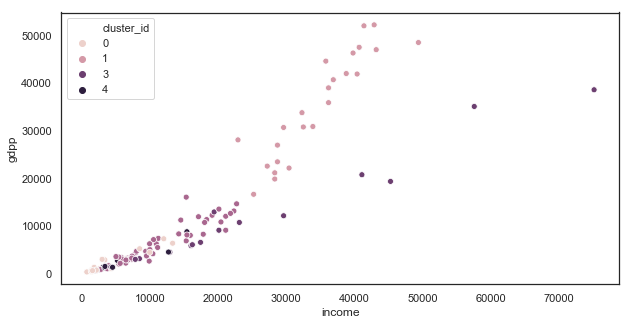

In [267]:
fig = plt.figure(figsize=[10,5])
sns.scatterplot(x='income',y='gdpp',hue = 'cluster_id',data=df2)
plt.show()

`We can clearly understand that with the increase in Income, GDP is raising Linearly`

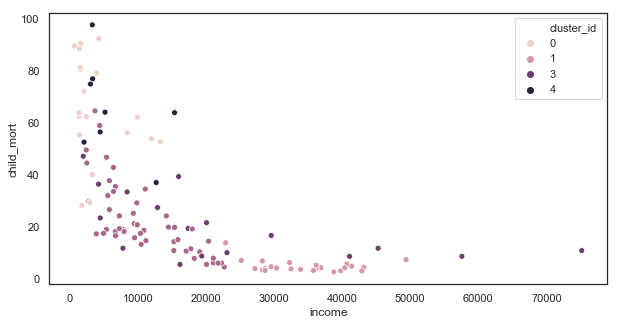

In [268]:
fig = plt.figure(figsize=[10,5])
sns.scatterplot(x='income',y='child_mort',hue = 'cluster_id',data=df2)
plt.show()

`It is clear that with the increase of Income, child deaths are decreasing`

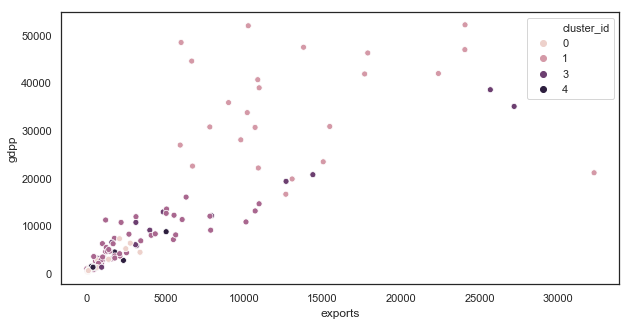

In [269]:
fig = plt.figure(figsize=[10,5])
sns.scatterplot(x='exports',y='gdpp',hue = 'cluster_id',data=df2)
plt.show()

`It is understood that countries reporting high GDP has more exports`

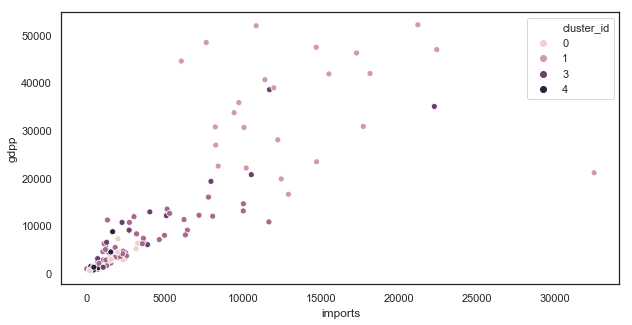

In [270]:
fig = plt.figure(figsize=[10,5])
sns.scatterplot(x='imports',y='gdpp',hue = 'cluster_id',data=df2)
plt.show()

`Imports are good with the countries which are reporting high GDP`

# Hierarchical Clustering

In [271]:
df_hc = df_pca_final.copy()

In [272]:
df_hc.head()

,PC1,PC2,PC3
0,-2.637442,1.469038,-0.541359
2,-0.457626,-0.673301,0.961867
4,0.649849,-1.024374,-0.250103
6,-0.332692,-1.274517,0.176636
7,3.180362,-0.250785,-0.116877


In [273]:
# instantiate
scaler = StandardScaler()

df_hc = scaler.fit_transform(df_hc)

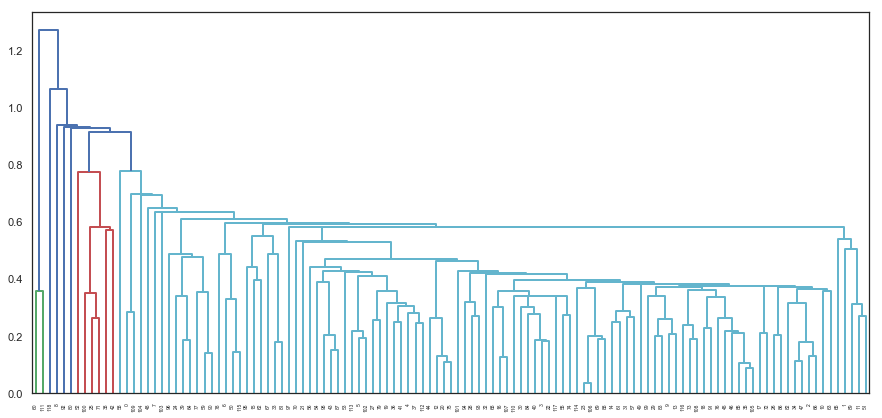

In [274]:
fig = plt.figure(figsize=[15,7])
mergings = linkage(df_hc, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

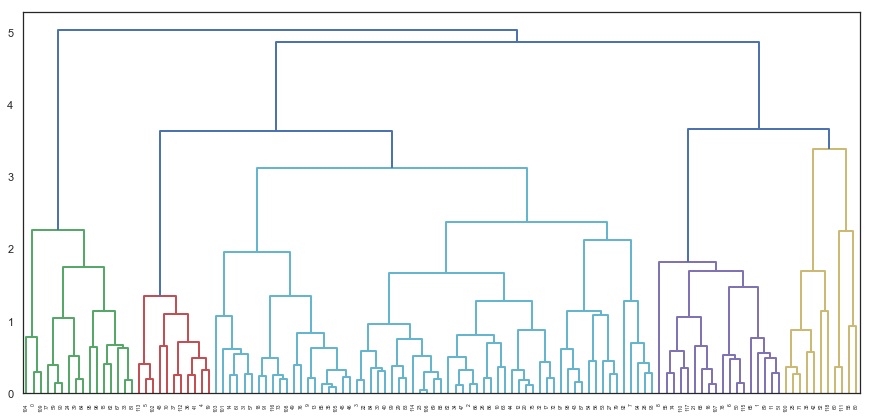

In [275]:
fig = plt.figure(figsize=[15,7])
mergings = linkage(df_hc, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [276]:
# 5 clusters
cluster_labels = cut_tree(mergings, n_clusters=5).reshape(-1, )
cluster_labels

array([0, 1, 2, 2, 3, 3, 1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 3, 2, 1,
       2, 2, 0, 4, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 3, 3, 4, 0, 2, 3, 4, 2,
       2, 2, 2, 2, 3, 2, 1, 1, 4, 2, 2, 1, 2, 2, 4, 0, 4, 2, 0, 2, 0, 1,
       2, 0, 1, 2, 3, 4, 2, 2, 1, 2, 2, 0, 1, 2, 4, 0, 2, 2, 2, 2, 2, 2,
       2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 4, 2, 3, 2, 0, 2, 2, 1, 2, 0,
       1, 4, 3, 3, 2, 1, 2, 1, 4])

In [277]:
df_hc1 = pd.DataFrame(df_hc)

In [278]:
df_hc1.columns = ['PC1','PC2','PC3']

In [279]:
# assigning the labels
df_hc1['cluster_id'] = kmeans.labels_
df_hc1.shape

(119, 4)

In [280]:
df_countries = df[['country']]

In [281]:
df_5 = pd.concat([df_countries,df_hc1], axis =1)

In [282]:
df_5.head()

,country,PC1,PC2,PC3,cluster_id
0,Afghanistan,-1.695773,2.758995,-1.057009,0.0
1,NaN,-0.334942,-0.355194,2.019252,3.0
2,Algeria,0.356440,-0.865527,-0.460971,2.0
3,NaN,-0.256947,-1.229145,0.412324,2.0
4,Antigua and Barbuda,1.936206,0.258992,-0.188333,1.0


## Analysing gdpp, child_mort and income for each cluster

In [283]:
df_income_0 = df_merge_1[df_merge_1['cluster_id']==0]
df_income_1 = df_merge_1[df_merge_1['cluster_id']==1]
df_income_2 = df_merge_1[df_merge_1['cluster_id']==2]
df_income_3 = df_merge_1[df_merge_1['cluster_id']==3]
df_income_4 = df_merge_1[df_merge_1['cluster_id']==4]

In [284]:
df_gdpp_cm_0 = df_income_0[['gdpp', 'child_mort','income']]
df_gdpp_cm_1 = df_income_1[['gdpp', 'child_mort','income']]
df_gdpp_cm_2 = df_income_2[['gdpp', 'child_mort','income']]
df_gdpp_cm_3 = df_income_3[['gdpp', 'child_mort','income']]
df_gdpp_cm_4 = df_income_4[['gdpp', 'child_mort','income']]

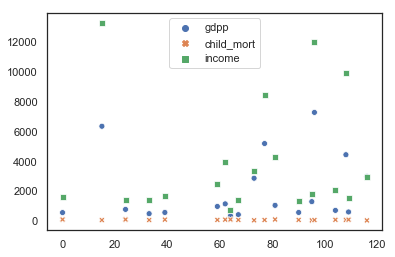

In [285]:
# Cluster 0 
fig = plt.figure(figsize=[6,4])
sns.scatterplot(data=df_gdpp_cm_0)
plt.show()

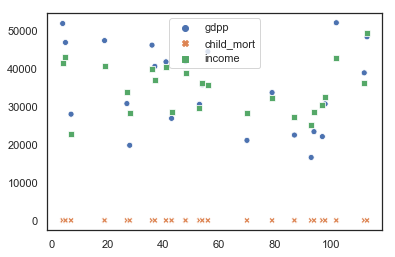

In [286]:
# Cluster 1 
fig = plt.figure(figsize=[6,4])
sns.scatterplot(data=df_gdpp_cm_1)
plt.show()

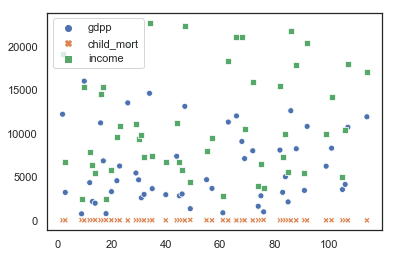

In [287]:
# Cluster 2 
fig = plt.figure(figsize=[6,4])
sns.scatterplot(data=df_gdpp_cm_2)
plt.show()

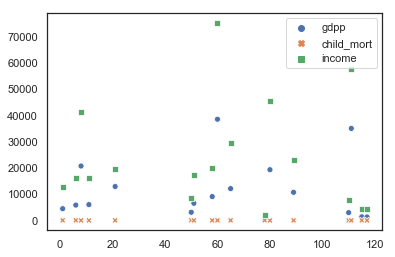

In [288]:
# Cluster 3 
fig = plt.figure(figsize=[6,4])
sns.scatterplot(data=df_gdpp_cm_3)
plt.show()

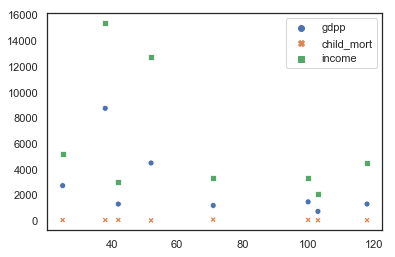

In [289]:
# Cluster 4 
fig = plt.figure(figsize=[6,4])
sns.scatterplot(data=df_gdpp_cm_4)
plt.show()

## Performing Visualization on the clusters with Principal Components

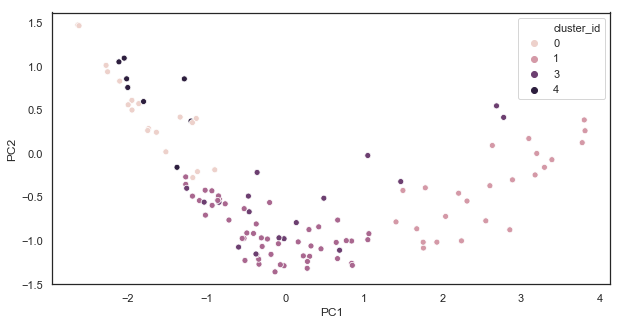

In [290]:
fig = plt.figure(figsize=[10,5])
sns.scatterplot(x='PC1',y='PC2',hue = 'cluster_id',data=df)
plt.show()

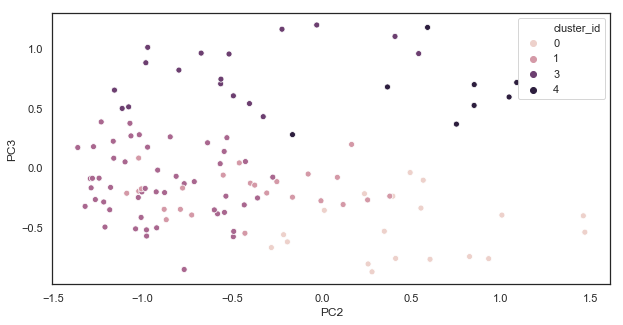

In [291]:
fig = plt.figure(figsize=[10,5])
sns.scatterplot(x='PC2',y='PC3',hue = 'cluster_id',data=df)
plt.show()

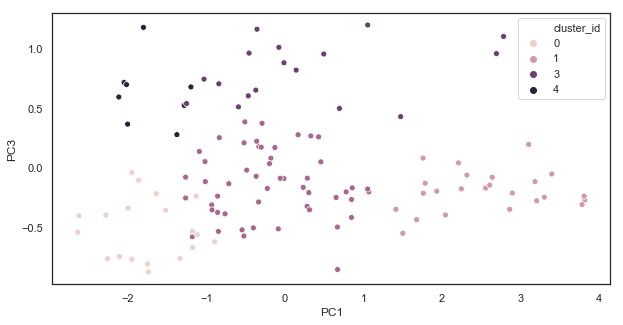

In [292]:
fig = plt.figure(figsize=[10,5])
sns.scatterplot(x='PC1',y='PC3',hue = 'cluster_id',data=df)
plt.show()

# `Final Result`

Among both K-means and Hierarchical Clustering, we see good clusters are forming with K-means clustering.

Results are not identical with both types of clustering.

### `Inputs from K-means Clustering`

It is observed that good clusters are formed with K-means clustering.

1. Countries which falls under cluster 1 doesn't need any aid as they are well developed

2. Countries which falls under cluster 0 and 2 need more focus and support from HELP. Predominantly cluster 2 need more attention.

3. Cluster 3 and 4 has mixed results and spread is even.

Well Developed Countries which doesn't require any aid from HELP

In [293]:
# Cluster 1

df_income_1.sort_values('country')

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,cluster_id
4,Australia,4.8,10276.2,10847.1,4530.87,41400,1.160,82.0,1.93,51900,1
5,Austria,4.3,24059.7,22418.2,5159.00,43200,0.873,80.5,1.44,46900,1
7,Bahamas,13.8,9800.0,12236.0,2209.20,22900,-0.393,73.8,1.86,28000,1
19,Canada,5.6,13793.4,14694.0,5356.20,40700,2.870,81.3,1.63,47400,1
27,Cyprus,3.6,15461.6,17710.0,1838.76,33900,2.010,79.9,1.42,30800,1
28,Czech Republic,3.4,13068.0,12454.2,1560.24,28300,-1.430,77.5,1.51,19800,1
36,Finland,3.0,17879.4,17278.8,4134.90,39800,0.351,80.0,1.87,46200,1
37,France,4.2,10880.8,11408.6,4831.40,36900,1.050,81.4,2.03,40600,1
41,Germany,4.2,17681.4,15507.8,4848.80,40400,0.758,80.1,1.39,41800,1
43,Greece,3.9,5944.9,8258.3,2770.70,28700,0.673,80.4,1.48,26900,1


## `Countries which falls under Cluster 2 need more focus and aid from HELP`

In [294]:
df_income_2.country.unique()

array(['Antigua and Barbuda', 'Armenia', 'Bangladesh', 'Barbados',
       'Belize', 'Bhutan', 'Bolivia', 'Brazil', 'Bulgaria', 'Cambodia',
       'Cape Verde', 'China', 'Colombia', 'Croatia', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia',
       'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Jamaica',
       'Jordan', 'Kyrgyz Republic', 'Latvia', 'Lithuania', 'Malaysia',
       'Maldives', 'Mauritius', 'Moldova', 'Morocco', 'Myanmar', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Samoa',
       'Seychelles', 'St. Vincent and the Grenadines', 'Suriname',
       'Tonga', 'Tunisia', 'Turkey', 'Uruguay'], dtype=object)

In [295]:
# Cluster 2

df_income_2.sort_values('country')

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,cluster_id
2,Antigua and Barbuda,10.3,5551.00000,7185.800000,735.6600,19100,1.440,76.8,2.13,12200,2
3,Armenia,18.1,669.76000,1458.660000,141.6800,6700,7.770,73.3,1.69,3220,2
9,Bangladesh,49.4,121.28000,165.244000,26.6816,2440,7.140,70.4,2.33,758,2
10,Barbados,14.2,6320.00000,7792.000000,1275.2000,15300,0.321,76.7,1.78,16000,2
12,Belize,18.8,2525.88000,2495.500000,225.6800,7880,1.140,71.4,2.71,4340,2
13,Bhutan,42.7,926.50000,1541.260000,113.3600,6420,5.990,72.1,2.38,2180,2
14,Bolivia,46.6,815.76000,679.140000,95.8320,5410,8.780,71.6,3.20,1980,2
16,Brazil,19.8,1198.40000,1321.600000,1009.1200,14500,8.410,74.2,1.80,11200,2
17,Bulgaria,10.8,3433.68000,3625.200000,469.9080,15300,1.110,73.9,1.57,6840,2
18,Cambodia,44.4,425.22600,467.670000,44.6448,2520,3.120,66.1,2.88,786,2


In [296]:
df_aid = df_income_2[df_income_2['income']<9000]
df_aid_final = df_aid.sort_values('income', ascending = True)

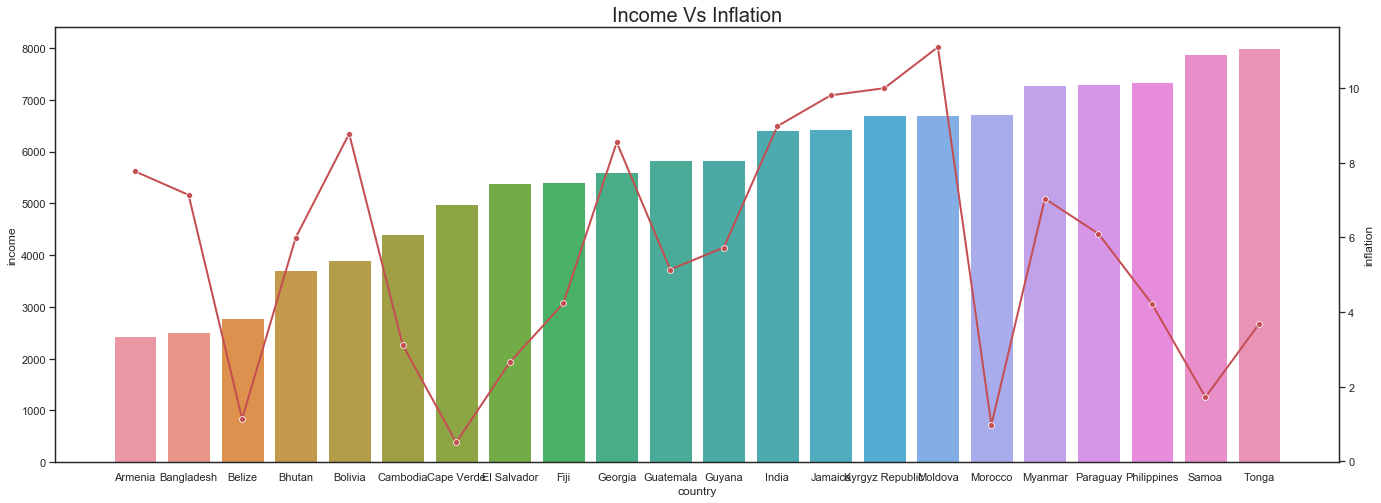

In [297]:
# Visual Representation

# Countires which need more aid (Filtered based on Income and Inflation from Cluster 2)

sns.set(style="white", rc={"lines.linewidth": 2})
fig, ax1 = plt.subplots(figsize=(23,8))
ax2 = ax1.twinx()
sns.barplot(x= df_aid_final['country'],
            y= df_aid_final['income'], 
            ax=ax1)
sns.lineplot(x=df_aid_final['country'], 
             y=df_aid_final['inflation'],
             color='r',
             marker="o",
             ax=ax2)
plt.title('Income Vs Inflation',fontsize=20)
plt.xlabel('Country',fontsize=20)
plt.xticks(rotation=45)
plt.show()

`Although attention is needed on all the above countries, further filteration can be done based on Inflation.`

Below are few countries with high inflation and very low income

1. Armenia
2. Bangladesh
3. Bhutan
4. Bolivia
5. Georgia
6. Moldova etc.

## -------------------------------------------------- The End -----------------------------------------------